# 1 Business Understanding

### 1.1 Background
Malaria and typhoid are two of the most common diseases in Ghana, especially in rural and low-income areas. Both cause fever, headache, and body weakness, and they affect many people every year. Because the symptoms are so similar, health workers often find it hard to know which disease a patient has without lab tests. However, many clinics and health centers in rural areas do not have the tools, supplies, or trained staff to run these tests.

As a result, patients are usually treated based on symptoms alone. This leads to wrong treatments, like giving malaria medicine to someone who actually has typhoid, or giving antibiotics to someone with malaria. Wrong treatment can make patients sicker, increase healthcare costs, and lead to drug resistance, which makes future treatments less effective.

### 1.2 Problem Statement
The main problem is that malaria and typhoid are hard to tell apart based on symptoms, and many health facilities lack access to reliable lab tests. This results in misdiagnosis, incorrect treatment, and growing drug resistance. The situation is worse in rural areas where healthcare resources are limited.

### 1.3 Business Goal
The goal is to improve the accuracy of diagnosing malaria and typhoid in primary healthcare settings, especially in rural areas of Ghana. By doing this, we can ensure patients get the right treatment faster, reduce the misuse of drugs, and lower the risk of drug resistance.

### 1.4 Project Objective
This project aims to develop a simple, smart tool using machine learning that can help health workers tell the difference between malaria and typhoid based only on a patient’s symptoms and basic information (like age, location, and fever duration). The tool will work even in clinics without lab testing and can be used on mobile phones or simple computers.

### 1.5 Success Criteria
The project will be considered successful if:

#### Technical Success
* The tool correctly identifies whether a patient has malaria or typhoid at least 85% of the time.

#### Business Success
* It reduces the number of wrong treatments given.
* It helps health centers make faster and more accurate decisions without needing lab tests.








# 2. Data Understanding 

In [23]:
# importing libraries 
import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [24]:
#import dataset
df = pd.read_csv('../dataset/malaria_typhoid_data.csv')
df.head(20)

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss,Condition
0,38.0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,Malaria
1,37.4,1,0,0,0,0,1,1,0,1,1,1,0,0,0,Malaria
2,38.1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,Malaria
3,39.0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,Both
4,37.3,0,0,1,0,1,1,0,0,1,0,0,1,0,0,Both
5,37.3,1,1,1,0,1,0,0,1,1,0,0,0,1,0,Malaria
6,39.1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,Both
7,38.3,0,0,0,1,0,1,1,0,1,0,0,1,1,0,Typhoid
8,37.0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,Malaria
9,38.0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,Typhoid


In [25]:
df.shape

(10000, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       10000 non-null  float64
 1   Headache          10000 non-null  int64  
 2   Fatigue           10000 non-null  int64  
 3   Loss_of_Appetite  10000 non-null  int64  
 4   Abdominal_Pain    10000 non-null  int64  
 5   Diarrhea          10000 non-null  int64  
 6   Anemia            10000 non-null  int64  
 7   Nausea            10000 non-null  int64  
 8   Vomiting          10000 non-null  int64  
 9   Chills            10000 non-null  int64  
 10  Sweating          10000 non-null  int64  
 11  Joint_Pain        10000 non-null  int64  
 12  Cough             10000 non-null  int64  
 13  Weakness          10000 non-null  int64  
 14  Weight_Loss       10000 non-null  int64  
 15  Condition         10000 non-null  object 
dtypes: float64(1), int64(14), object(1)
memor

In [27]:
df.describe()

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.497830,0.508200,0.492000,0.491300,0.511000,0.508500,0.493800,0.499700,0.503100,0.507300,0.503200,0.498900,0.491900,0.496500,0.503100
std,1.004104,0.499958,0.499961,0.499949,0.499904,0.499953,0.499987,0.500025,0.500015,0.499972,0.500015,0.500024,0.499959,0.500013,0.500015
min,33.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,38.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#missing values
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [29]:
# checking for duplicates
print("Duplicates:",df.duplicated().sum())

Duplicates: 43


### Insights from Data Assessment and Quality Checks

#### 1. Dataset Size

* Rows: 10,000

* Columns: 16

#### 2. Feature Types

* 1 float64 feature → Temperature (continuous, numeric)

* 14 int64 features → symptoms (mostly binary: 0 = No, 1 = Yes)

* 1 object feature → Condition (target variable, categorical)

Predictors are all numeric; only target is categorical → good for ML models.

#### 3. Data Completeness

* No missing values (10,000 non-null in all columns).

* No NaNs detected, but best to confirm with df.isnull().sum().sum().

#### 4. Feature Distribution (from df.describe())

#####  Temperature:

* Range: 33.6°C – 41.4°C

* Mean: 37.5°C, Std: ~1.0

* Typical human body temp is 36.5–37.5°C → values above 38°C indicate fever.

#####  Symptoms (binary features):

* Mean values are ~0.49–0.51 → symptoms are almost evenly distributed (≈50% of patients report each symptom).

* 25%, 50%, 75% quantiles → confirm binary encoding (0 or 1).

Key Features for Diagnosis

* Malaria indicators: High fever, chills, sweating, anemia, joint pain.

* Typhoid indicators: Abdominal pain, diarrhea, vomiting, weight loss, weakness.

Condition column = target (disease label).

Condition
Malaria    4033
Both       3054
Typhoid    2913
Name: count, dtype: int64


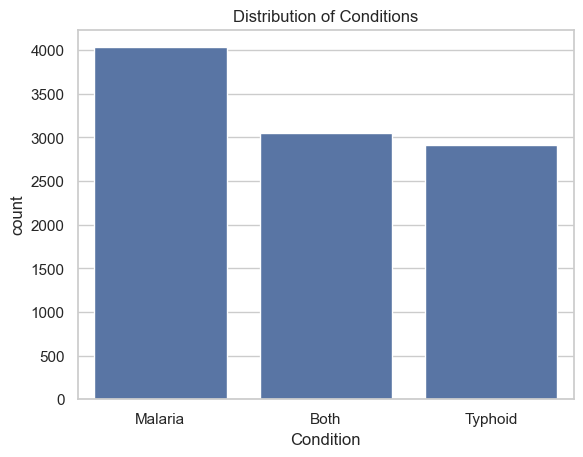

In [30]:
#class distribution
print(df['Condition'].value_counts())
sns.countplot(x='Condition', data=df)
plt.title("Distribution of Conditions")
plt.show()

### Univariate Analysis

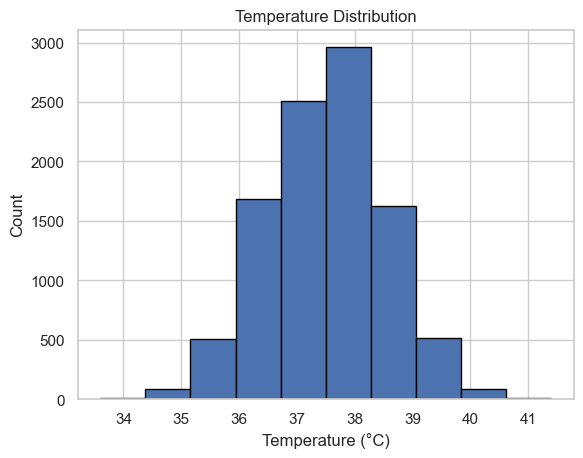

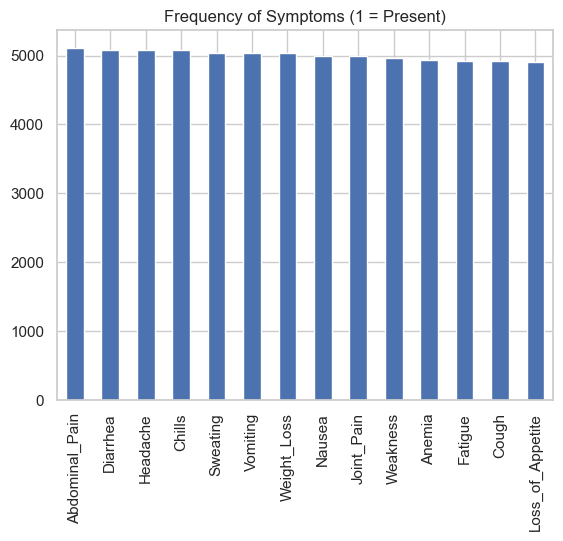

In [31]:
# Numerical variable: Temperature
plt.hist(df['Temperature'], bins=10, edgecolor="black")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.title("Temperature Distribution")
plt.show()

# Binary symptoms: count of 1s and 0s
symptoms = df.drop(columns=['Temperature','Condition'])
symptoms.sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Frequency of Symptoms (1 = Present)")
plt.show()


### Insight from Univariate Analysis


🔹 Temperature Distribution

The temperature distribution in the dataset follows a normal-like pattern centered around 37–38°C, which aligns with typical fever ranges observed in malaria and typhoid cases.

* Most patients recorded mild to moderate fever within this range.

* Extremely low (<35°C) or very high (>40°C) temperatures are rare, suggesting that extreme fevers are not common in this dataset.

* This indicates that temperature alone may not be sufficient to differentiate between conditions, but it provides a good baseline indicator of illness.

### Bivariate Analysis

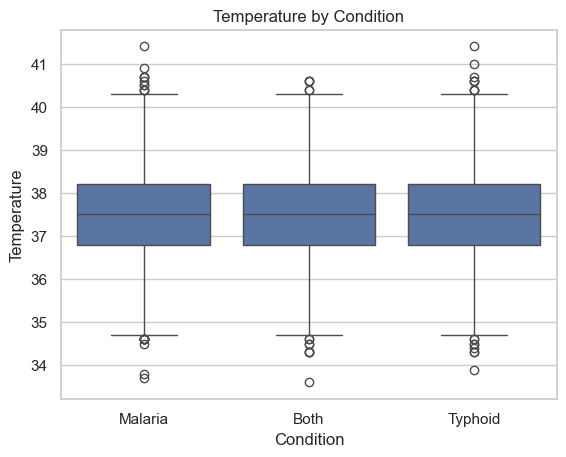

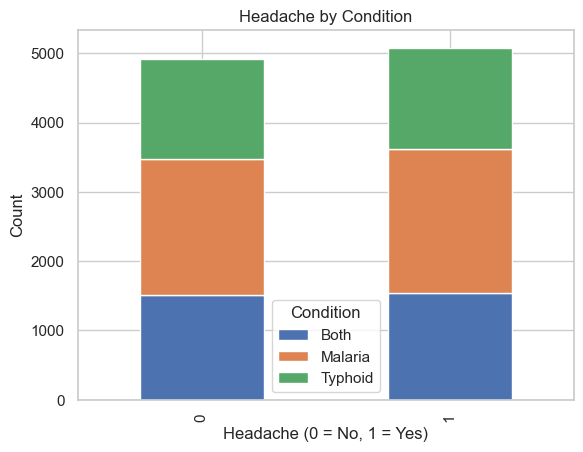

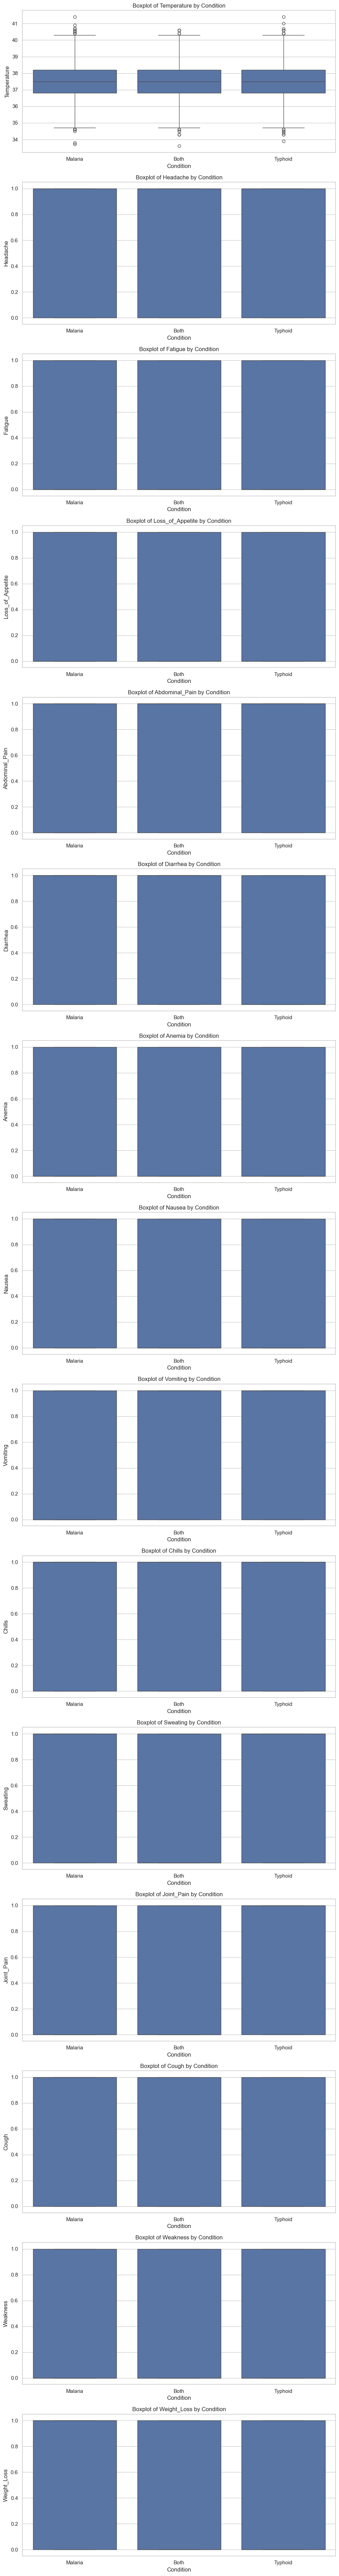

In [32]:
# Temperature vs Condition
sns.boxplot(x="Condition", y="Temperature", data=df)
plt.title("Temperature by Condition")
plt.show()

# Example: Headache vs Condition
pd.crosstab(df['Headache'], df['Condition']).plot(kind="bar", stacked=True)
plt.title("Headache by Condition")
plt.xlabel("Headache (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Box plots for all numerical features by Condition
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x='Condition', y=col, data=df)
    plt.title(f'Boxplot of {col} by Condition')
    plt.tight_layout()
plt.show()


In [33]:
# create a contingency table
contingency_table = pd.crosstab(df['Condition'], df['Headache'])
print("Contingency Table (Counts) - Headache vs Condition:")
print(contingency_table)
print("\n")


# calculate percentages
percentage_table = pd.crosstab(df['Condition'], df['Headache'], normalize='index') * 100
print("Percentage Table (% within each Condition):")
print(percentage_table.round(2))  # Round to 2 decimal places
print("\n")

# Calculate headache prevalence by condition
headache_prevalence = df.groupby('Condition')['Headache'].mean() * 100
print("Percentage of Patients with Headache (Yes = 1) by Condition:")
print(headache_prevalence.round(2))
print("\n" + "="*50 + "\n")

# readable output
# A more reader-friendly output focusing on 'Headache = Yes'
# Group by condition and calculate the mean of 'Headache'. 
# Since Headache is 1/0, the mean is the percentage of 'Yes'.
headache_prevalence = df.groupby('Condition')['Headache'].mean() * 100
print("Percentage of Patients with Headache (Yes = 1) by Condition:")
print(headache_prevalence.round(2))


Contingency Table (Counts) - Headache vs Condition:
Headache      0     1
Condition            
Both       1518  1536
Malaria    1955  2078
Typhoid    1445  1468


Percentage Table (% within each Condition):
Headache       0      1
Condition              
Both       49.71  50.29
Malaria    48.48  51.52
Typhoid    49.61  50.39


Percentage of Patients with Headache (Yes = 1) by Condition:
Condition
Both       50.29
Malaria    51.52
Typhoid    50.39
Name: Headache, dtype: float64


Percentage of Patients with Headache (Yes = 1) by Condition:
Condition
Both       50.29
Malaria    51.52
Typhoid    50.39
Name: Headache, dtype: float64


In [34]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

#print results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nInterpretation:")
if p < 0.05:
    print(f"The p-value is {p:.4f} (less than 0.05). We reject the null hypothesis.")
    print("There is a statistically significant association between the patient's Condition and whether they had a headache.")
else:
    print(f"The p-value is {p:.4f} (greater than 0.05). We fail to reject the null hypothesis.")
    print("There is NO statistically significant association between the patient's Condition and headaches.")


Chi-Square Test Results:
Chi2 Statistic: 1.3498
P-value: 0.5092
Degrees of Freedom: 2

Interpretation:
The p-value is 0.5092 (greater than 0.05). We fail to reject the null hypothesis.
There is NO statistically significant association between the patient's Condition and headaches.


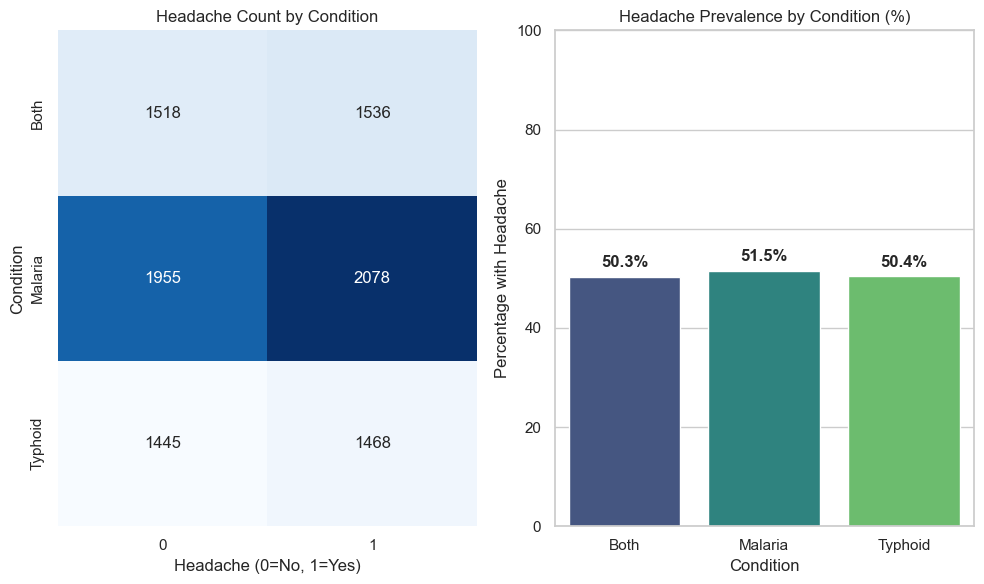

In [35]:
# Visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create subplots
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Headache Count by Condition')
plt.ylabel('Condition')
plt.xlabel('Headache (0=No, 1=Yes)')

plt.subplot(1, 2, 2)
ax = sns.barplot(x=headache_prevalence.index, y=headache_prevalence.values, palette="viridis", legend=False)
plt.title('Headache Prevalence by Condition (%)')
plt.ylabel('Percentage with Headache')
plt.ylim(0, 100)

# Add percentage labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontweight='bold')

plt.tight_layout()
plt.show()


### Insight From Bivariate Analysis

The analysis reveals that headache is a non-specific symptom that does not statistically differentiate between Malaria, Typhoid, and co-infections. While present in approximately half of all cases across conditions, it should not be used as a distinguishing feature in clinical decision-making or predictive modeling without consideration of other symptoms.

🔹 Temperature by Condition

The boxplot shows how temperature varies across conditions (Malaria, Typhoid, Both):

1. Similar median temperatures

* All three conditions (Malaria, Typhoid, Both) have median temperatures around 37–38°C.

* This suggests that temperature alone cannot reliably distinguish between the diseases.

2. Overlap across conditions

* The interquartile ranges (IQR) for Malaria, Typhoid, and Both are highly overlapping, reinforcing that fever is a common symptom across all conditions.

3. Presence of outliers

* Outliers exist on both the lower end (~34–35°C) and higher end (~40–41°C).

* These extreme temperatures may represent unusual or severe cases, but they occur in all conditions.

4. Slight variation in spread

* Typhoid cases show a slightly wider spread compared to Malaria and Both, suggesting that typhoid may present with a broader range of fever intensities.

* Malaria and Both conditions appear more tightly clustered around 37–38°C.



### Multivariate Analysis

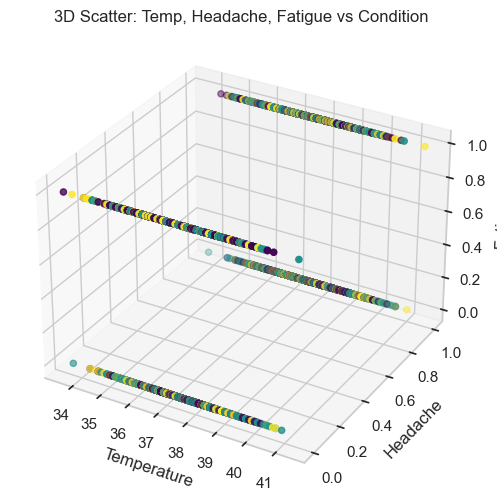

In [36]:
# Select a few key features for clarity
key_features = ['Temperature', 'Headache', 'Fatigue', 'Chills', 'Abdominal_Pain']

# 3D scatter (Temperature, Headache, Fatigue vs Condition)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Temperature'], df['Headache'], df['Fatigue'],
           c=df['Condition'].astype('category').cat.codes, cmap='viridis')

ax.set_xlabel('Temperature')
ax.set_ylabel('Headache')
ax.set_zlabel('Fatigue')
plt.title("3D Scatter: Temp, Headache, Fatigue vs Condition")
plt.show()


##### 3D scatter plot is ideal here because it allows visualization of relationship between three or more numeric variables the same time, while also encoding the target (condition)using the color. At the univariate and bivariate levels, simpler and more interpretable plots (histogram, bar, scatter, violin) are better suited since they focus on one or two variables only. 

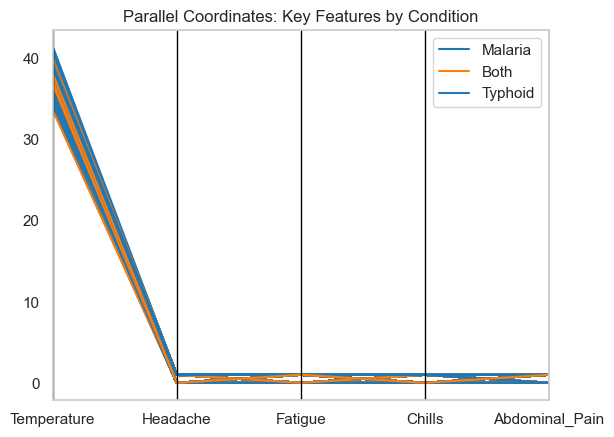

In [37]:
parallel_coordinates(df[['Temperature', 'Headache', 'Fatigue', 'Chills', 'Abdominal_Pain', 'Condition']], 
                     'Condition', color=['#1f77b4','#ff7f0e'])
plt.title("Parallel Coordinates: Key Features by Condition")
plt.show()

### Insights from Multivariate Analysis

#### * Temperature differences:

* Both conditions generally show higher body temperatures (>38°C).

* Typhoid tends to cluster around normal to slightly elevated temperatures.

#### * Symptom associations:

* Chills align strongly with Malaria cases (clear in the parallel coordinates).

* Abdominal Pain is more pronounced in Typhoid and Both.

* Headache and Fatigue appear frequently across all conditions, offering less separation.

#### * 3D Scatter confirmation:

* The scatter shows layered bands for Headache and Fatigue (binary features), combined with temperature variation.

* Clusters form where high temperature + fatigue/headache point towards Malaria, while moderate temperature with abdominal pain suggest Typhoid.

* Some overlap exists, reinforcing the need for ML models to separate conditions.